# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_data = soup(html, 'html.parser')


In [5]:
# Extract all rows of data
table=mars_weather_data.find(class_='table')
data_rows=table.find_all(class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
empty_list = []

# Loop through the scraped data to create a list of rows
for row in data_rows:
    # Extract data from each row
    columns = row.find_all('td')  # Assuming <td> tags are used for column data
    
    # Extract individual values from the columns
    id = columns[0].text
    terrestrial_date = columns[1].text
    sol = columns[2].text
    ls = columns[3].text
    month = columns[4].text
    min_temp = columns[5].text
    pressure = columns[6].text
    
    # Create a list for the current row
    row_data = [id, terrestrial_date, sol, ls, month, min_temp, pressure]
    
    # Append the list to the empty_list
    empty_list.append(row_data)

# Define column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(empty_list, columns=column_names)

# Confirm DataFrame was created successfully
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [8]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date']) 
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [9]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
months = df['month'].nunique()

print("Number of unique months on Mars:", months)


Number of unique months on Mars: 12


In [11]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].nunique()

print("Number of Martian days':", martian_days)


Number of Martian days': 1867


In [12]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print("Average Minimum Temperature by Month on Mars:")
average_low_temp_by_month

Average Minimum Temperature by Month on Mars:


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

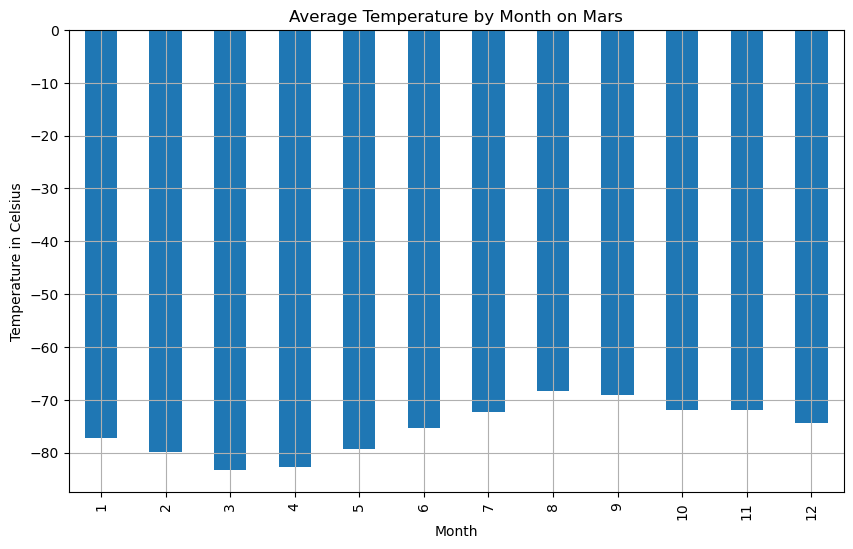

In [13]:
# Plot the average temperature by month
average_temp_by_month = df.groupby('month')['min_temp'].mean()

plt.figure(figsize=(10, 6))
average_temp_by_month.plot(kind='bar')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

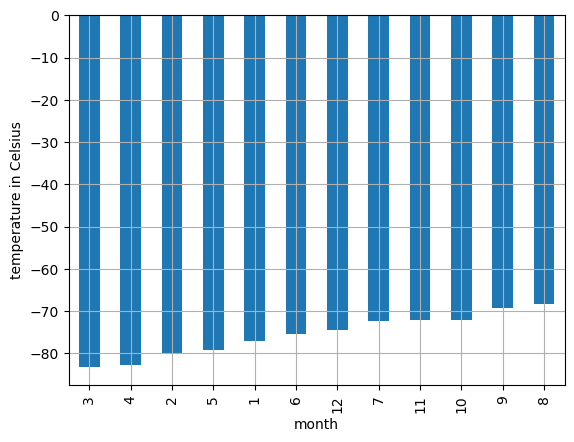

In [14]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month=average_low_temp_by_month.sort_values(ascending=True)
average_low_temp_by_month.plot(kind='bar')
plt.ylabel('temperature in Celsius')
plt.grid(True)
plt.show()

In [15]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

average_pressure_df = pd.DataFrame({
    'Martian Month': average_pressure_by_month.index,
    'Average Pressure': average_pressure_by_month.values
})

average_pressure_df

,Martian Month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


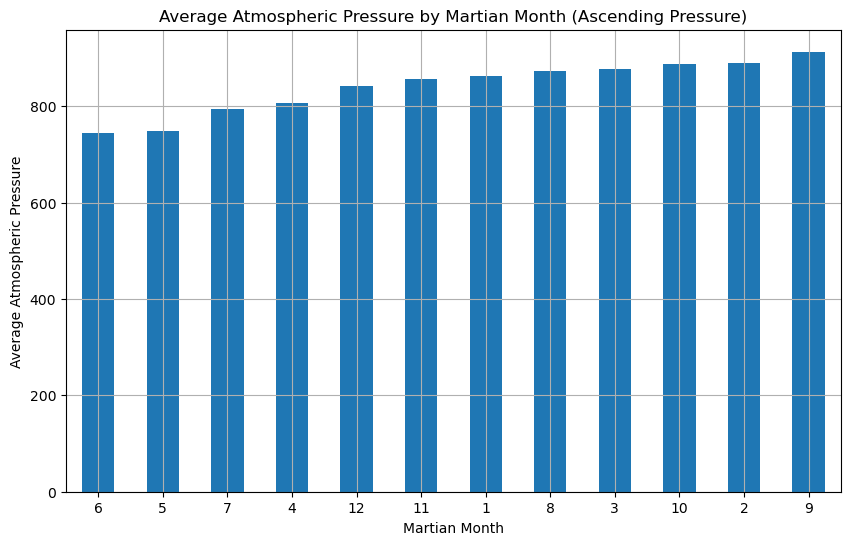

In [16]:
# Plot the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

sorted_pressure = average_pressure_by_month.sort_values()

plt.figure(figsize=(10, 6))
sorted_pressure.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Martian Month (Ascending Pressure)')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

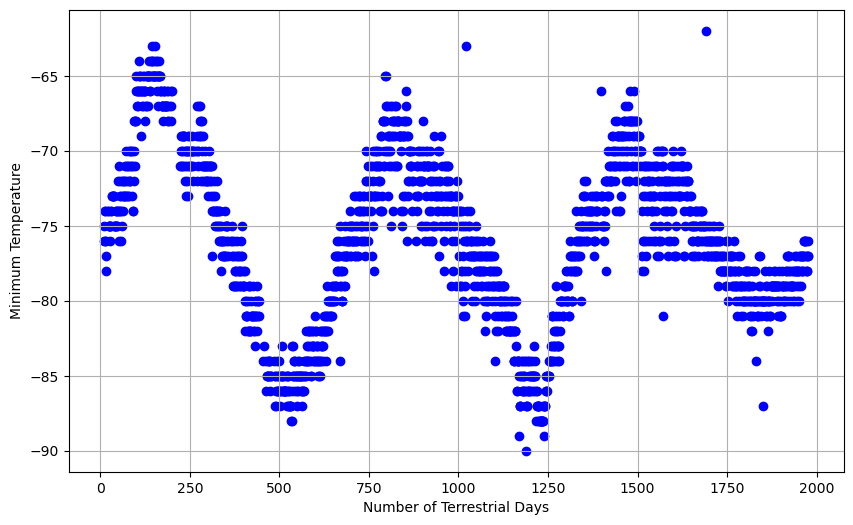

Estimated number of terrestrial days in a Martian year: 2.7176128093158662


In [17]:
martian_year_days = 687
num_martian_years = df['terrestrial_date'].nunique() / martian_year_days

# Create a scatter plot for number of terrestrial days vs minimum temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['sol'], df['min_temp'], color='blue')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.show()

# Print the estimated number of terrestrial days in a Martian year
print("Estimated number of terrestrial days in a Martian year:", num_martian_years)

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the data to a CSV
df.to_csv('results.csv')


In [ ]:
browser.quit()